#Q2


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import sklearn.naive_bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Function to display confusion matrix using ConfusionMatrixDisplay
def conf_matrix_disp(classifier, x_test, y_test, class_names):
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title('Confusion matrix')
    plt.show()

In [ ]:
# Read the dataset (assuming 'BreastCancer.csv' file exists)
data = pd.read_csv('BreastCancer.csv').dropna(axis=0)

# Drop irrelevant features for classification
x = data.drop(['Class','Sample code number'],axis=1)
y = data["Class"]

# Split the data into train, validation, and test sets
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x,y,test_size=0.1,shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid,y_train_valid,test_size=0.2,shuffle=True)


In [ ]:
# Multinomial Naive Bayes classifier
MNB = sklearn.naive_bayes.MultinomialNB()
clf = MNB.fit(x_train_valid, y_train_valid)
score = cross_val_score(clf, x_train_valid, y_train_valid, cv=10)

Model accuracy in each validation fold: 
 [0.82258065 0.82258065 0.93548387 0.9516129  0.93442623 0.98360656
 0.90163934 0.83606557 0.90163934 0.93442623]
Model accuracy score: 89.85507246376811
Confusion matrix: 
 [[42  4]
 [ 3 20]]
True Negatives(TN) =  42
True Positives(TP) =  20
False Positives(FP) =  4
False Negatives(FN) =  3
Number of test cases (equal to the sum of confusion matrix elements): 69


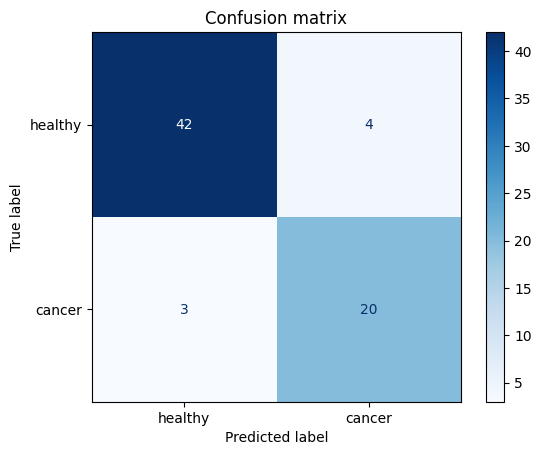

In [ ]:
# Cross-validate the model on training and validation sets
print(f"Model accuracy in each validation fold: \n {score}")

# Make predictions on the test set
y_predict = MNB.predict(x_test)

# Evaluate the model accuracy on the test set
print(f"Model accuracy score: {100*accuracy_score(y_test, y_predict)}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(f"Confusion matrix: \n {conf_matrix}")
print('True Negatives(TN) = ', conf_matrix[0,0])
print('True Positives(TP) = ', conf_matrix[1,1])
print('False Positives(FP) = ', conf_matrix[0,1])
print('False Negatives(FN) = ', conf_matrix[1,0])
print(f"Number of test cases (equal to the sum of confusion matrix elements): {np.sum(conf_matrix)}")

# Display the confusion matrix using ConfusionMatrixDisplay
conf_matrix_disp(MNB, x_test, y_test, ['healthy', 'cancer'])


In [ ]:
# Gaussian Naive Bayes classifier
GNB = sklearn.naive_bayes.GaussianNB()
clf = GNB.fit(x_train_valid, y_train_valid)

# Cross-validate the model on training and validation sets
score = cross_val_score(clf, x_train_valid, y_train_valid, cv=10, n_jobs=-1)
print(f"Model accuracy in each validation fold: \n {score}")

Model accuracy in each validation fold: 
 [0.9516129  0.91935484 0.9516129  0.96774194 0.96721311 1.
 0.98360656 0.96721311 0.98360656 0.96721311]


Model accuracy score: 92.7536231884058
Confusion matrix: 
 [[42  4]
 [ 1 22]]
True Negatives(TN) =  42
True Positives(TP) =  22
False Positives(FP) =  4
False Negatives(FN) =  1
Number of test cases (equal to the sum of confusion matrix elements): 69


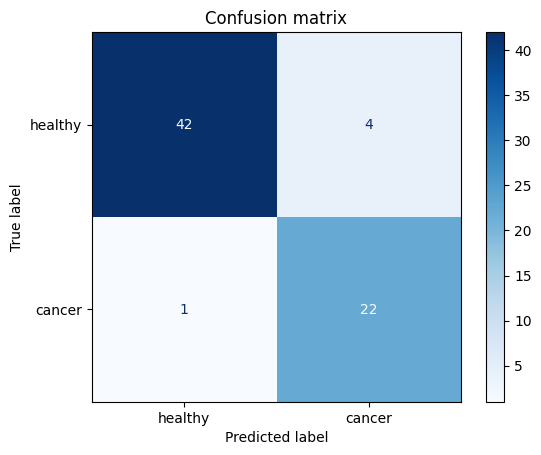

In [ ]:
# Make predictions on the test set
y_predict = GNB.predict(x_test)

# Evaluate the model accuracy on the test set
print(f"Model accuracy score: {100*accuracy_score(y_test, y_predict)}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(f"Confusion matrix: \n {conf_matrix}")
print('True Negatives(TN) = ', conf_matrix[0,0])
print('True Positives(TP) = ', conf_matrix[1,1])
print('False Positives(FP) = ', conf_matrix[0,1])
print('False Negatives(FN) = ', conf_matrix[1,0])
print(f"Number of test cases (equal to the sum of confusion matrix elements): {np.sum(conf_matrix)}")

# Display the confusion matrix using ConfusionMatrixDisplay
conf_matrix_disp(GNB, x_test, y_test, ['healthy', 'cancer'])